C:\Users\Main\AppData\Local\Temp\ipykernel_21256\1054270590.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(0, inplace=True)


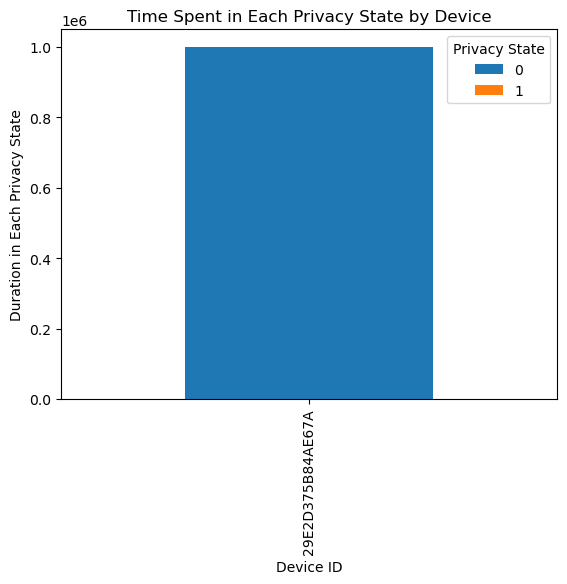

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = [
    {
        "_id": {"$oid": "668439eea51a5edd701047a6"},
        "uniqueId": "29E2D375B84AE67A",
        "endpointId": "1",
        "changeType": 0,
        "connectionStatus": 0,
        "booleanState": False,
        "privacyState": 0,
        "timestamp": {"$numberLong": "1719941614318"},
        "__v": 0
    },
    {
        "_id": {"$oid": "668439eea51a5edd701047a7"},
        "uniqueId": "29E2D375B84AE67A",
        "endpointId": "1",
        "changeType": 0,
        "connectionStatus": 0,
        "booleanState": False,
        "privacyState": 1,
        "timestamp": {"$numberLong": "1719942614318"},
        "__v": 0
    },
    # Add more entries...
]

# Convert to DataFrame
df = pd.json_normalize(data)
df['timestamp'] = pd.to_numeric(df['timestamp.$numberLong'])

# Sort by uniqueId and timestamp
df = df.sort_values(by=['uniqueId', 'timestamp'])

# Calculate the duration for each state
df['next_timestamp'] = df.groupby('uniqueId')['timestamp'].shift(-1)
df['duration'] = df['next_timestamp'] - df['timestamp']

# Handle the last state duration as 0 (or you may assign it a large value if it represents ongoing state)
df['duration'].fillna(0, inplace=True)

# Aggregate the total time spent in each privacyState for each device
duration_df = df.groupby(['uniqueId', 'privacyState'])['duration'].sum().unstack(fill_value=0)

# Plotting
duration_df.plot(kind='bar', stacked=True)
plt.xlabel('Device ID')
plt.ylabel('Duration in Each Privacy State')
plt.title('Time Spent in Each Privacy State by Device')
plt.legend(title='Privacy State')
plt.show()